# Risk factors associated with developing heart disease

## About this notebook
***

This notebook aims to simulate the **risk of a person developing heart disease** (our [dependent variable](https://www.verywellmind.com/what-is-a-dependent-variable-2795099)) based on 3 [independent variables](https://www.verywellmind.com/what-is-the-independent-variable-2795278):
1. The **number of cigarettes** the person smokes per day
2. The person's **Body Mass Index (BMI)**, calculated as the person's weight divided by their heights squared
3. The person's **total cholesterol** levels

Our task is to build a dataframe using simulated data for each of these variables. To 'mimic' the behaviour of the data, their likely distribution and nature, as well as the relationships between independent and dependent variables, however, we have to rely on real-world data - in our case, data collected for the famous [Framingham Heart Study](https://en.wikipedia.org/wiki/Framingham_Heart_Study).

## The Framingham Heart Study
***

<p>In the Autumn of 1948, a pioneer study on risk factors associated with developing heart disease kickstarted in the small town of Framingham, Massachussetts. Despite being the cause of roughly half of the deaths in the US in the early 1940's, cardiovascular disease was still poorly understood in terms of prevention and treatment [1]. So much so that some argue that even the then US President, Frankling D. Roosevelt could have lived longer if only his first signs of cardiovascular disease have been detected earlier [1].The Framingham Heart Study aimed at filling that knowledge gap and investigated which factors (behavioural, physiological, demographic etc) were playing a part in the development of heart disease.</p>

<p>In its first round, the study evaluated health parametres of 5,209 residents of the town, such as their dietary, exercising, and smoking habits, blood pressure, heart rate, age, and history of underlying conditions (e.g. diabetes, and/or strokes).</p>

<p>When the results of the study were published nine years later, in 1957, it was the first time that tobacco consumption, obesity, high cholesterol and high blood pressure were linked with a higher risk of someone developing cardiovascular disease [2]. Since then, the study was granted funding for additional rounds, evaluating these and other parametres among the children and grandchildren of the original cohorts. It is still being conducted to this day, having gathered and analysed epidemiological data from more than 15,000 individuals from three generations for more than 70 years [3].</p>

## Requirements
***

### Importing required packages

For this project, we'll need to import `numpy`, from which we will use the `numpy.random` module to create arrays of random values. We'll also need `scipy.stats` for truncated normal distributions (by using it's built-in function `truncnorm`), `pandas` for creating and manipulating our dataframe, and `matplotlib.pyplot` for plotting.

In [3]:
#Arrays
import numpy as np

#Truncated normal distribution
import scipy.stats as stats

#Dataframes
import pandas as pd

#Plotting
import matplotlib.pyplot as plt

## A glance at the original dataframe
***

<p>As mentioned above, our simulated data will be informed by real-world data from the Framingham Heart Disease Study. We though, then, that it could be useful to have a quick look into the original data to see if we can find any patterns, determine some basic parametres for our variables (such as mean, santandard deviation, min and max values, etc.), and have a general understanding of the data.</p>

For that, we'll first load the data into a `pandas` dataframe.

**Data source:** https://www.kaggle.com/naveengowda16/logistic-regression-heart-disease-prediction/version/1

In [14]:
#Load dataset into pandas
original_df = pd.read_csv('data/framingham_heart_disease.csv')

#Show first 5 rows
original_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


The original dataset has a number of other variables that we won't consider for the purpose of this simulation. Here, we only need to understand the data about number of cigarettes smoked per day, total cholesterol, BMI, and the risk of developing a heart disease in ten years (TenYearCHD, where 1 means 'yes' and 0 means 'no'). First thing we need to do, then, is to drop all other columns and keep only those that are interesting to us. After that, we can use the `DataFrame.describe()` function in `pandas` to get more information about these data.

In [16]:
#Keep only our variables of interest
original_df = original_df[['cigsPerDay','totChol','BMI','TenYearCHD']]

#Describe variables
original_df.describe()

,cigsPerDay,totChol,BMI,TenYearCHD
count,4209.000000,4188.000000,4219.000000,4238.000000
mean,9.003089,236.721585,25.802008,0.151958
std,11.920094,44.590334,4.080111,0.359023
min,0.000000,107.000000,15.540000,0.000000
25%,0.000000,206.000000,23.070000,0.000000
50%,0.000000,234.000000,25.400000,0.000000
75%,20.000000,263.000000,28.040000,0.000000
max,70.000000,696.000000,56.800000,1.000000


Now that we know each variable's means, min and max values and standard deviations, we can try to plot them and see how their distributions loook like.
We'll do this using the `fig,ax = plt.subplot()` method in `pyplot`, in which we define the attributes of our figure (`fig`) as well as our sets of axes (`ax1`, `ax2`, etc.) and plot a histogram of each variable using `plt.hist()`.

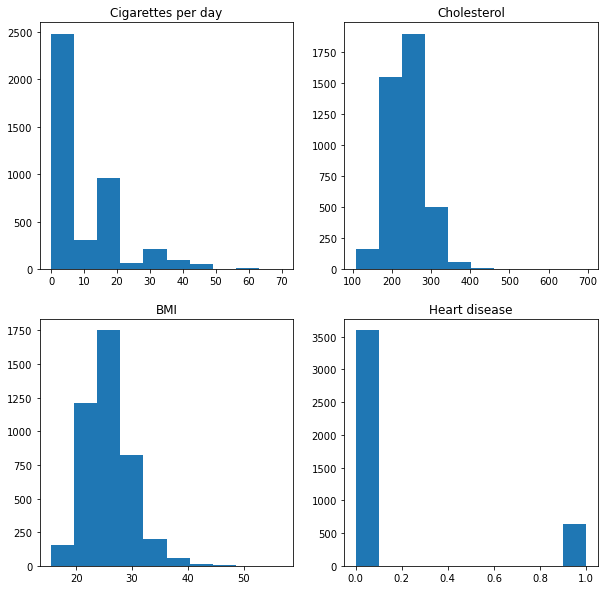

In [17]:
#Define subplots
fig,([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2,figsize = (10,10))

#Set variables
cigs = original_df['cigsPerDay']
totChol = original_df['totChol']
BMI = original_df['BMI']
TYCHD = original_df['TenYearCHD']



#Set plot titles
ax1.set_title('Cigarettes per day')
ax2.set_title('Cholesterol')
ax3.set_title('BMI')
ax4.set_title('Heart disease')


#What to plot in each ax
ax1.hist(cigs)
ax2.hist(totChol)
ax3.hist(BMI)
ax4.hist(TYCHD)

plt.show()


## Simulating data
***

<p>Data simulation is a process of generating random data following stochastic - or random - processes (i.e. processes of collecting random variables that are indexed against another variable or set of variables) [4][5]. Running a simulation is useful when you know the nature and the likely behaviour of different variables in a given system, but want to understand their interdependencies, how they impact a given outcome, or to test the validity of a model or an algorithm.</p>

### Cigarettes per day

[2 3 1 ... 0 4 0]


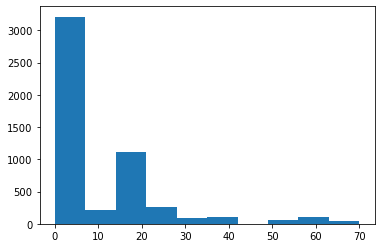

In [22]:
#Number of possible cigarettes per day
a = np.array([0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,40,50,60,70])

#Probability, based on real-world data
p = np.array([0.2,0.1,0.1,0.1,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.2,0.05,0.02,0.02,0.01,0.02,0.01])

#Random array of 5209 values based on a and p
cigs_per_day = np.random.choice(a=a, size=5209, p=p)

print(cigs_per_day)

plt.hist(cigs_per_day)
plt.show()

### Cholesterol

[234. 261. 266. ... 255. 302. 235.]


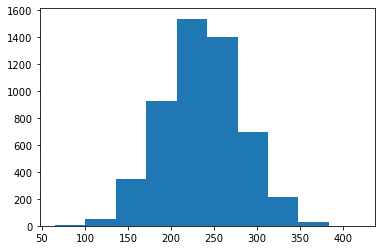

In [13]:
#Normal distribution based on real-world data description
randomFloats = np.random.normal(237,45, size=(5209))

#Cholesterol has only round values
chol = np.round(randomFloats)

plt.hist(chol)
plt.show()

### BMI

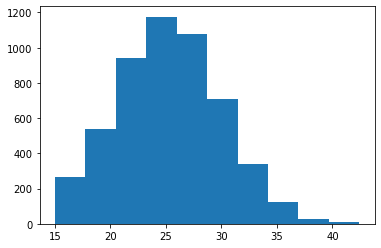

In [27]:
#Define boundaries, mean, std, and sample size
lower = 15
upper = 50
mu = 25
sigma = 5
sample = 5209

#Random variates with truncated normal distribution
bmi = stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=sample)


plt.hist(bmi)

plt.show()

## Dataframe

In [28]:
data = np.array([cigs_per_day,bmi,chol])

#Swap columns and rows
df = pd.DataFrame(data).transpose()

#Rename columns
df.columns = ['Cigarettes per day', 'BMI', 'Cholesterol']

#Sample of 5 random rows
df.sample(5)

,Cigarettes per day,BMI,Cholesterol
298,2.0,17.456449,298.813241
1281,1.0,25.409122,189.480502
1695,4.0,32.524964,224.434484
3923,60.0,25.706996,210.345075
2376,3.0,38.549926,150.804774


### Adding dependent variable (Risk)

In [33]:
#Define list of conditions

conditions = [
    (df['Cigarettes per day'] >= 20), #Heavy smokers
    (df['BMI'] >= 30),                #Obesity
    (df['Cholesterol'] >= 350),       #High cholesterol
    (df['Cigarettes per day'] >= 10) & (df['Cigarettes per day'] < 20) & (df['BMI'] >= 25) & (df['BMI'] < 30),
    (df['BMI'] < 25) & (df['Cholesterol'] >= 200) & (df['Cholesterol'] < 350),
     (df['BMI'] < 25) & (df['Cholesterol'] > 130) & (df['Cholesterol'] < 200),
    (df['Cigarettes per day']<=5) & (df['BMI'] >= 18.5) & (df['BMI'] <= 20) & (df['Cholesterol'] <= 130),    
]



#Set values for new column according to conditions
risk = ['Very high','Very high','Very high','High','High', 'Moderate','Very low']

#Add new column based on conditions and risk
df['Risk of heart disease'] = np.select(conditions, risk, default='Low')

df

,Cigarettes per day,BMI,Cholesterol,Risk of heart disease
0,2.0,31.010046,218.271201,Very high
1,3.0,19.690348,208.837081,High
2,1.0,30.427676,231.801935,Very high
3,2.0,25.573672,257.714217,Low
4,2.0,19.960276,248.167969,High
...,...,...,...,...
5204,20.0,30.613811,180.572389,Very high
5205,0.0,24.207761,172.346791,Moderate
5206,0.0,23.014267,233.811355,High
5207,4.0,30.277685,328.527764,Very high


In [34]:
df.describe()

,Cigarettes per day,BMI,Cholesterol
count,5209.000000,5209.000000,5209.000000
mean,10.721444,25.355968,236.337064
std,14.279299,4.621669,44.729645
min,0.000000,15.013187,73.803813
25%,1.000000,22.045169,206.147093
50%,4.000000,25.256637,235.872478
75%,20.000000,28.464993,266.764019
max,70.000000,42.415472,386.180168


## References
***

In [ ]:
[1]. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4159698/
[2]. https://www.britannica.com/event/Framingham-Heart-Studay
[3]. https://framinghamheartstudy.org/
[4]. https://www.sciencedirect.com/topics/earth-and-planetary-sciences/data-simulation
[5]. https://www.britannica.com/science/stochastic-process